In [1]:
import numpy as np
import pandas as pd

Parameters:

* `perplexity=30`
* `learning_rate="auto"`: `"auto"` means use the method of Belkina and co-workers which scaled the learning rate with the size of the dataset.
* `early_exaggeration_iter=250`
* `early_exaggeration=12`
* `n_iter=500`
* `exaggeration=None`: amount of exaggeration to apply during the non-early part of the iteration. Can give a more UMAP-like appearance.
* `dof=1`: degrees of freedom in the heavy-tail parameterization: `100` for SNE-like behavior. `0.5` gives noticeably compressed clusters.
* `theta=0.5`: amount of approximation when using Barnes-Hut (`negative_gradient_method="bh"`). `0` is exact t-SNE. Typical values 0.2-0.8. Can be set to `"auto"`.
* `n_interpolation_points=3`: an FFT setting. Don't touch it.
* `min_num_intervals=50`: another FFT setting. The higher the value, the more accurate the gradient calculation.
* `ints_in_interval=1`: grid size length in FFT. Lower is more accurate.
* `initialization="pca"`: one of `"pca"`, `"spectral"` or `"random"`. Or a matrix.
* `metric="euclidean"`: metric to use with one of the nearest neighbor methods.
* `metric_params=None`
* `initial_momentum=0.5`
* `final_momentum=0.8`
* `max_grad_norm=None`: clips the gradient norm.
* `max_step_norm=5`: clips the update step size.
* `n_jobs=1`: `-1` means use all processors, but at least with Barnes-Hut, too many threads can severely degrade performance. I recommend increasing `n_jobs` slowly rather than jumping straight
to `n_jobs=-1`.
* `neighbors="auto"`: one of: `"exact"`, `"annoy"`, `"pynndescent"`", `"hnsw"`, `"approx"` (`"annoy"` if possible, `"pynndescent"` otherwise) or `"auto"` (`"exact"` if `N < 1000` and `"approx"` otherwise).
* `negative_gradient_method="auto"`: one of: `"bh"` (Barnes-Hut), `"fft"` (FFT interpolation) or `"auto"` (BH if `N < 10000`, FFT otherwise).
* `callbacks=None`: one or a list of functors that implement `def callback(iteration, error, embedding):`
* `callbacks_every_iters=50`: number of iterations between the `callbacks` being called.
* `random_state=None`
* `verbose=False`

In [2]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("tsne"),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
)

[14:51:26] INFO     Getting dataset s1k                                              ]8;id=876303;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=375238;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=101110;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=417479;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Using precomputed knn                                                ]8;id=834012;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=198961;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#239\239]8;;\

           INFO     Using k_neighbors (no self) = 90 with perplexity 30.00               ]8;id=450012;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=341845;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#156\156]8;;\

           INFO     Found pre-calculated neighbors file:                             ]8;id=296665;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=741039;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#386\386]8;;\
                    nn/s1k.150.euclidean.exact.faiss.idx.npy                                        

           INFO     KNN index provided. Ignoring KNN-related parameters.             ]8;id=34415;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=424591;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py#190\190]8;;\

           INFO     Running t-SNE with initialization: None and params: {}               ]8;id=619597;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=643380;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#277\277]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related        ]8;id=934091;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=377853;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#1340\1340]8;;\
                    parameters.                                                                     

           INFO     Precomputed initialization provided. Ignoring initalization-related ]8;id=484702;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=799282;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#1348\1348]8;;\
                    parameters.                                                                     

           INFO     Automatically determined negative gradient method `bh`                ]8;id=261350;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=695301;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:51:30] INFO     Automatically determined negative gradient method `bh`                ]8;id=870813;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=902053;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:51:40] INFO     Embedding completed                                                  ]8;id=493769;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=992401;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#336\336]8;;\

           INFO     Evaluating                                                       ]8;id=556453;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=713892;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=123560;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=331739;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=754041;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=434568;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=451466;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=525260;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=214921;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=792328;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=980328;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=279524;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

[14:51:41] INFO     rpc-5-euclidean                                                       ]8;id=333349;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=976602;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=130939;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=151876;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=910935;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=398844;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=404570;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=547361;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=437224;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=526335;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=280534;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=621501;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Loading faiss with AVX2 support.                                   ]8;id=987063;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=195818;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss/loader.py#110\110]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=667437;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=411626;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss/loader.py#112\112]8;;\

[14:51:42] INFO     Plotting                                                         ]8;id=589125;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=863136;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

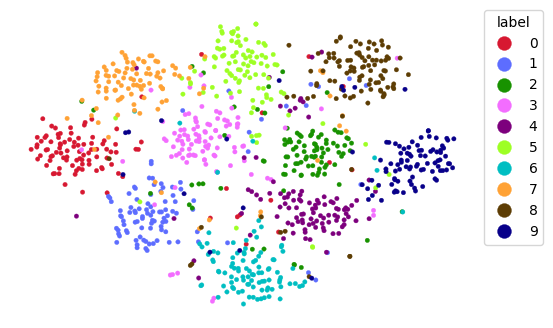

In [3]:
embed_result = embed_pipeline.run("s1k")

[14:51:44] INFO     Getting dataset s1k                                              ]8;id=58757;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=41139;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=242094;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=184136;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Using precomputed knn                                                ]8;id=151673;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=153734;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#239\239]8;;\

           INFO     Using k_neighbors (no self) = 90 with perplexity 30.00               ]8;id=590028;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=141420;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#156\156]8;;\

           INFO     Found pre-calculated neighbors file:                             ]8;id=668882;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=609494;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#386\386]8;;\
                    nn/s1k.150.euclidean.exact.faiss.idx.npy                                        

           INFO     KNN index provided. Ignoring KNN-related parameters.             ]8;id=86342;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=554133;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py#190\190]8;;\

           INFO     Using 'spectral' initialization                                      ]8;id=804836;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=919659;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#255\255]8;;\

           INFO     Running t-SNE with initialization: spectral and params: {'dof': 0.7} ]8;id=600222;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=50402;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#277\277]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related        ]8;id=74165;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=150193;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#1340\1340]8;;\
                    parameters.                                                                     

           INFO     Automatically determined negative gradient method `bh`                ]8;id=623299;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=185956;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:51:49] INFO     Automatically determined negative gradient method `bh`                ]8;id=469522;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=637335;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:52:02] INFO     Embedding completed                                                  ]8;id=127343;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=460043;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#336\336]8;;\

           INFO     Evaluating                                                       ]8;id=774304;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=332994;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=457348;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=911883;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=629156;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=629962;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=796495;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=632226;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=580433;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=115573;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=912606;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=591366;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=78431;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=502314;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=288320;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=758116;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=907705;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=714319;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=611451;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=417660;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=421634;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=223993;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=378072;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=941838;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

[14:52:03] INFO     Plotting                                                         ]8;id=284217;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=747560;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

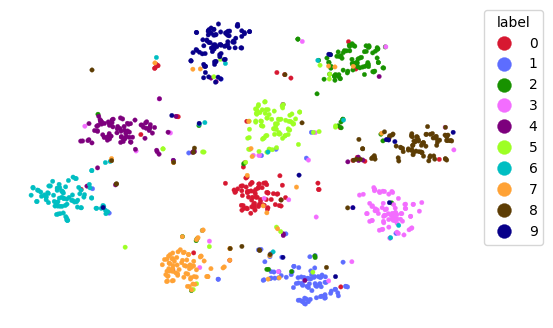

In [4]:
embed_result_spectral = pl.create_pipeline(
    method=pl.embedder("tsne", initialization="spectral", params=dict(dof=0.7)),
    eval_metrics=[
        "rte",
        "rpc",
        ("nnp", dict(n_neighbors=[15, 50, 150])),
    ],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
).run("s1k")

To use the uniform affinity kernel, where [n_neighbors should be set roughly to perplexity / 3](https://twitter.com/hippopedoid/status/1232698023253303298), use the `affinity="uniform"` embedding method parameter. Additionally, for larger datasets, you can use [annealed early exaggeration](https://proceedings.mlr.press/v196/gonzalez-marquez22a.html) to slowly step down the exaggeration factor rather than the abrupt change with `anneal_exaggeration=True` (although not all `params` are supported). Note that this is a home-grown implementation based on work by
the [Berens Lab](https://github.com/berenslab/pubmed-landscape/blob/eb963c42627da7439dffe1e962a404f76bc905ad/scripts/BERT-based-embeddings/05-rgm-pipeline-TFIDF-1M.ipynb), and it incurs twice as many gradient/error evaluations than necessary during the
annealing step because of how the `gradient_descent` routine is implemented internally in 
openTSNE, so this may be a bit slower than you are expecting.

[14:52:04] INFO     Getting dataset s1k                                              ]8;id=592123;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=438565;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=773047;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=812994;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Using precomputed knn                                                ]8;id=504387;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=709372;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#239\239]8;;\

           INFO     Calculating uniform affinities with n_neighbors = 10                 ]8;id=371395;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=474777;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#183\183]8;;\

[14:52:05] INFO     Found pre-calculated neighbors file:                             ]8;id=455739;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=852285;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#386\386]8;;\
                    nn/s1k.15.euclidean.exact.faiss.idx.npy                                         

           INFO     KNN index provided. Ignoring KNN-related parameters.            ]8;id=30317;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=359008;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py#1194\1194]8;;\

           INFO     Running t-SNE with initialization: None and params: {'n_iter': 2000} ]8;id=379393;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=987501;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#277\277]8;;\

           INFO     Running early exaggeration with exaggeration = 12.00 for 125         ]8;id=629826;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=897931;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#105\105]8;;\
                    iterations                                                                      

[14:52:07] INFO     Annealing exaggeration from 12.00 to 1.0 over 125 iterations         ]8;id=195641;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=140350;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#117\117]8;;\

[14:52:12] INFO     Running final optimization with momentum = 0.80 for 2000 iterations  ]8;id=984661;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=451397;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#130\130]8;;\

[14:52:50] INFO     Embedding completed                                                  ]8;id=988237;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=633683;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#336\336]8;;\

           INFO     Evaluating                                                       ]8;id=6231;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=859384;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=426229;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=147692;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=443413;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=830946;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=633875;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=797454;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=684654;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=613531;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=976597;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=231916;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=27990;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=6386;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=966491;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=387775;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=290852;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=101290;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=500429;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=976347;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=517392;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=186305;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=388621;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=300060;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

[14:52:51] INFO     Plotting                                                         ]8;id=803295;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=839412;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

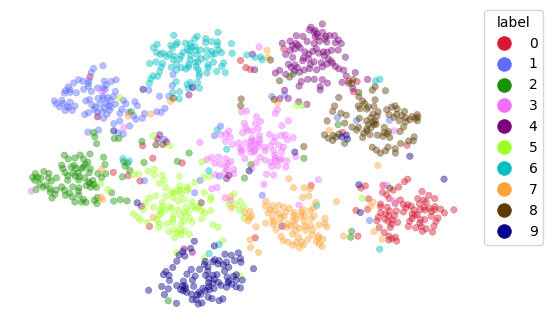

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.609), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.33598816), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.4340666666666667), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.46948), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.5049399999999999), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [5]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method=(
        "tsne",
        dict(
            affinity="uniform",
            n_neighbors=10,
            anneal_exaggeration=True,
        ),
    ),
    params=dict(n_iter=2000),
    dataset="s1k",
    verbose=True,
)